In [1]:
import pandas as pd
from ctgan import CTGAN
from table_evaluator import TableEvaluator
import pickle

# Loading

In [2]:
data = pd.read_csv("Dataset/insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [6]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Define categorical columns
categorical_features = ['age','sex', 'children', 'smoker', 'region']

# Training

In [10]:
ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs=200)

Gen. (0.03) | Discrim. (-0.06): 100%|████████████████████████████████████████████████| 200/200 [00:15<00:00, 12.69it/s]


In [11]:
# Save model
with open("models/ctgan_single.pkl", "wb") as f:
    pickle.dump(ctgan, f)
print("✅ CTGAN model saved!")

✅ CTGAN model saved!


# synthetic samples

In [12]:
samples = ctgan.sample(1000)
print("### Synthetic Samples Preview")
print(samples.head())

### Synthetic Samples Preview
   age     sex        bmi  children smoker     region       charges
0   37    male  18.764152         2     no  northeast  21607.557593
1   51  female  26.327850         0    yes  southeast  17127.152490
2   30    male  18.344811         0    yes  southeast   9074.105656
3   43    male  12.004468         0    yes  southeast   8453.386138
4   33  female  14.487634         3     no  southeast  18696.394912


# Evaluate

In [13]:
print(data.shape, samples.shape) 
table_evaluator = TableEvaluator(data, samples, cat_cols= categorical_features)

(1338, 7) (1000, 7)


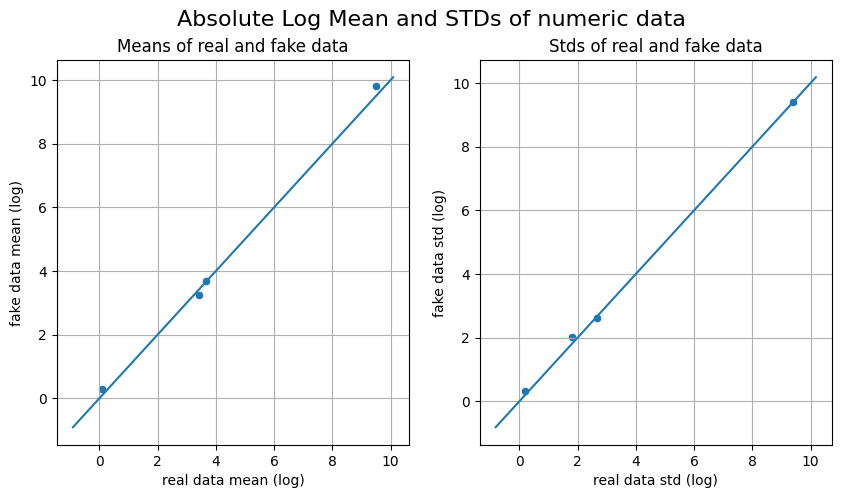

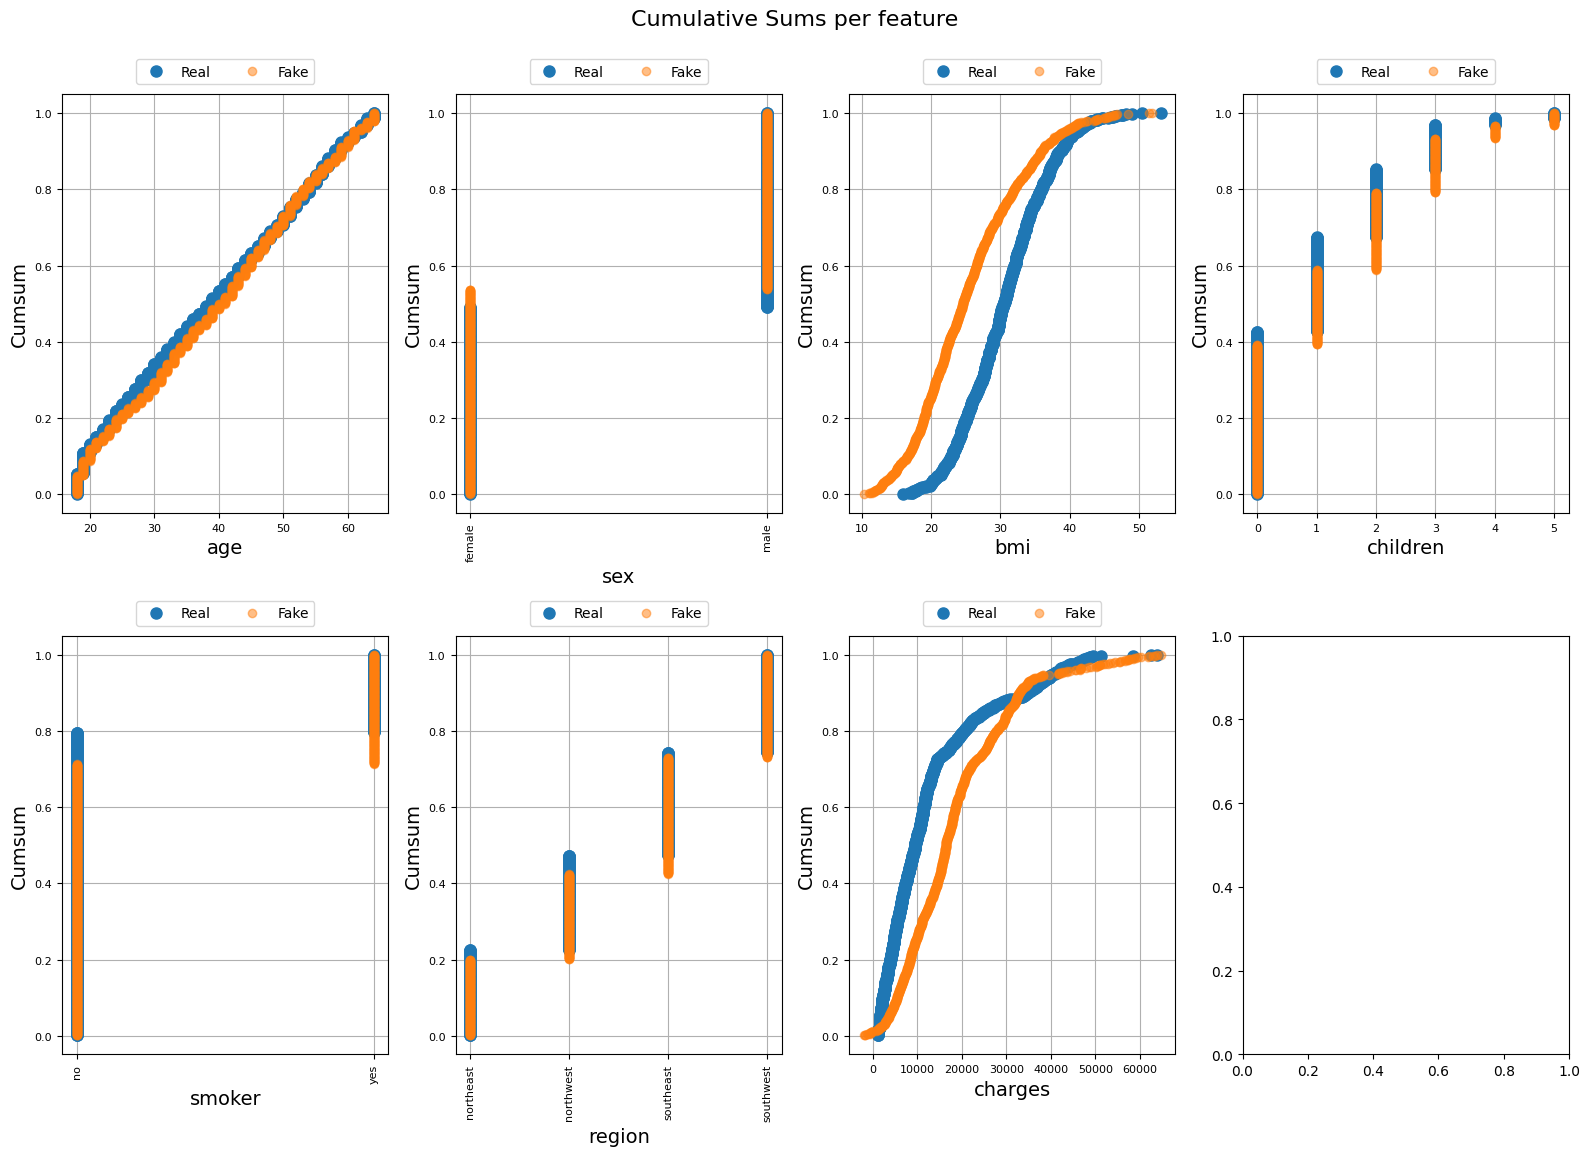

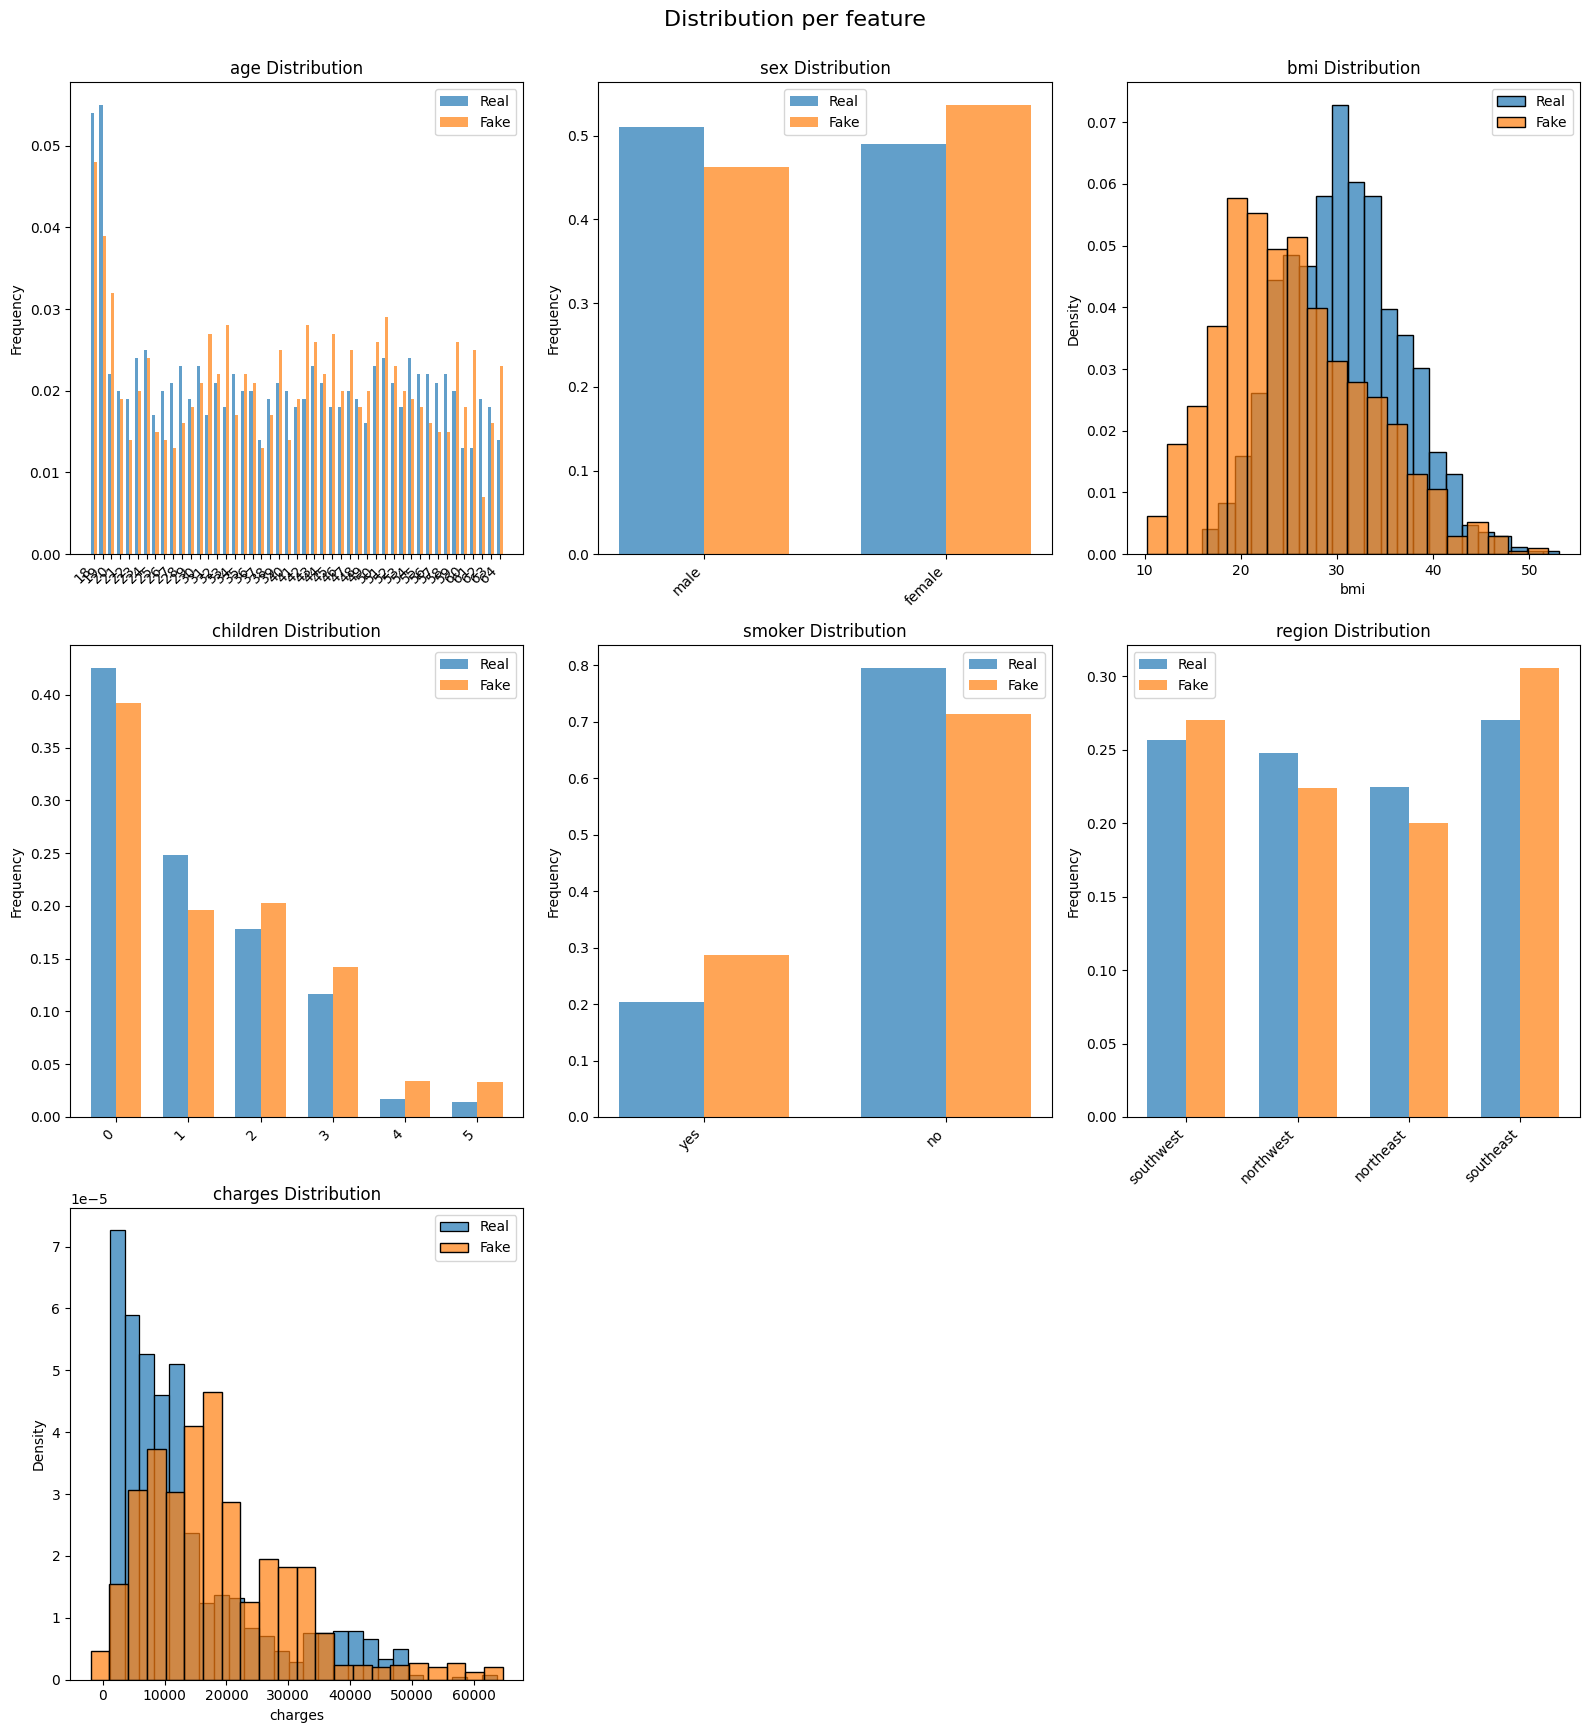

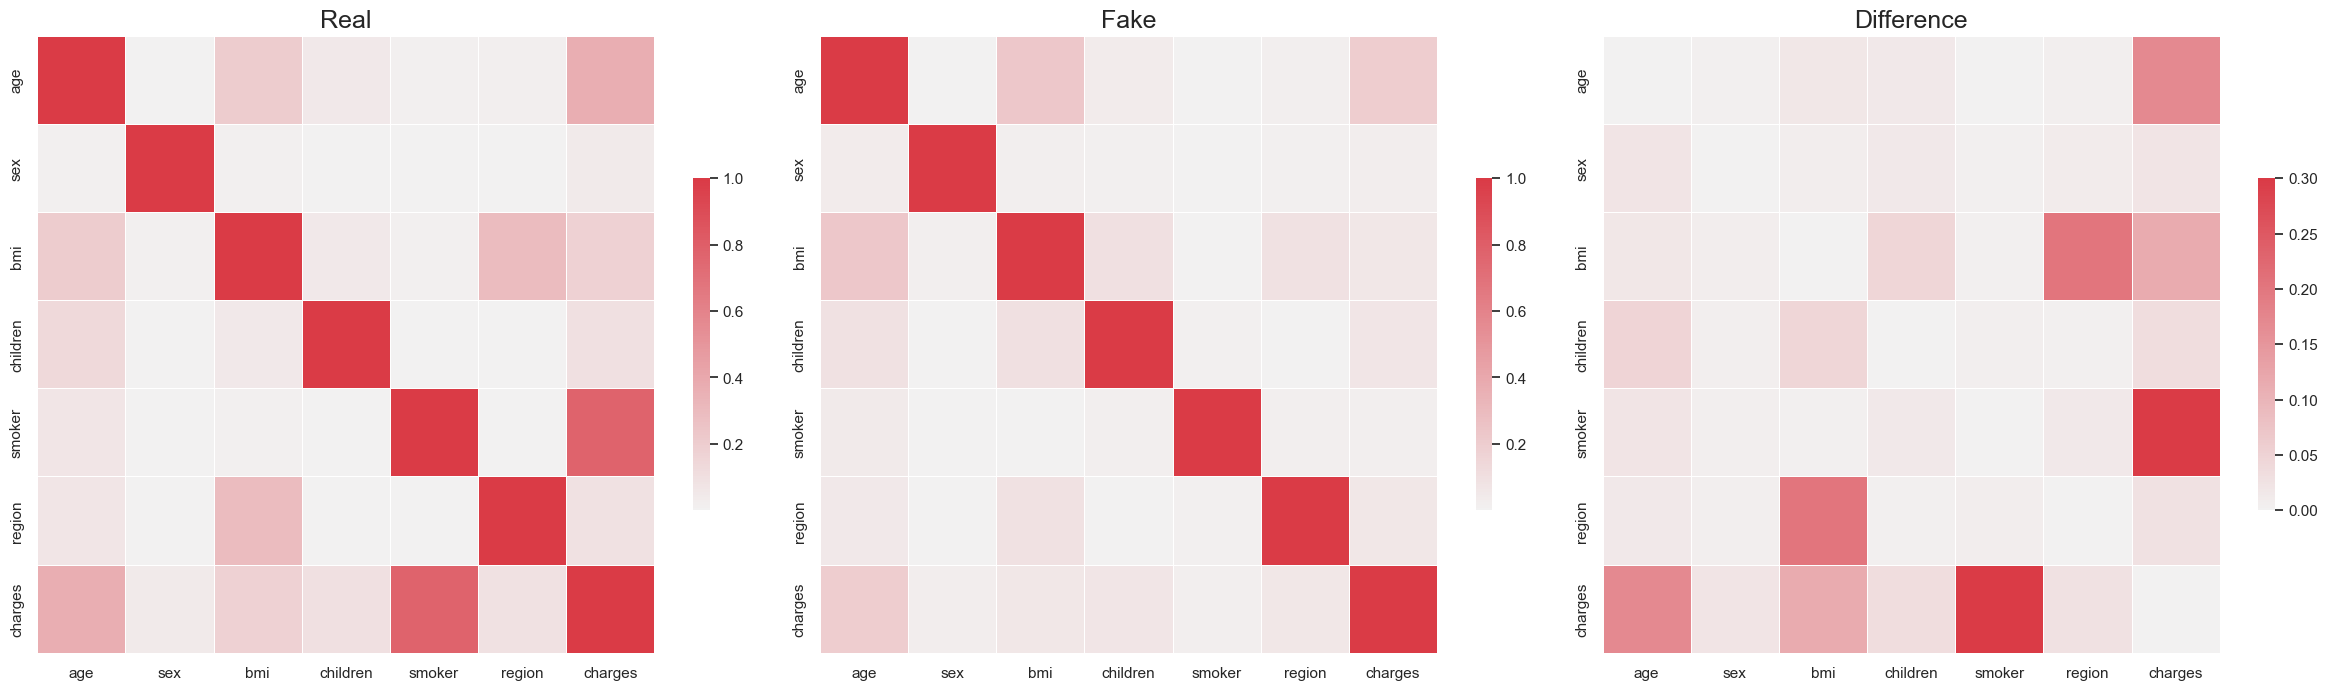

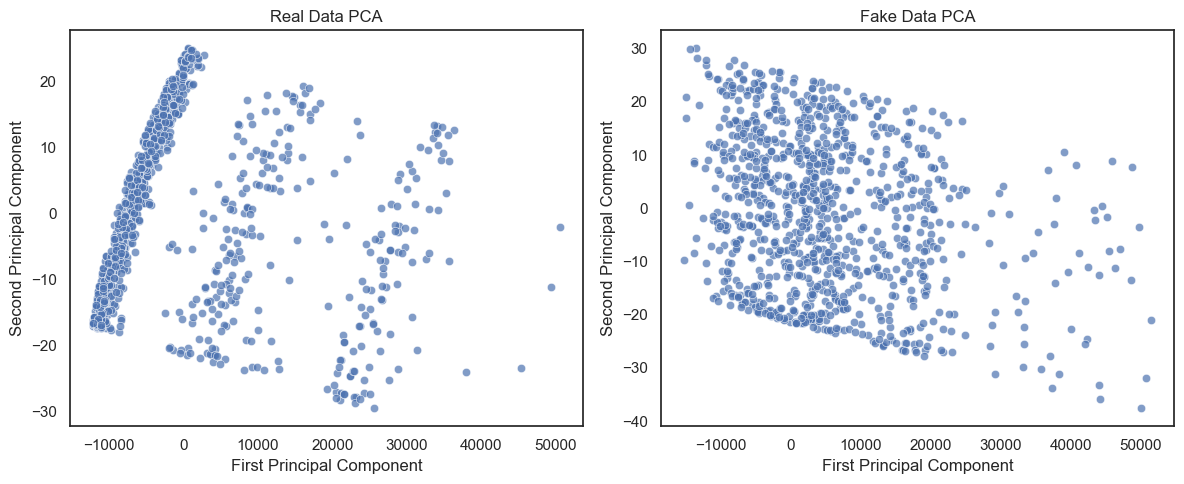

In [14]:
table_evaluator.visual_evaluation()